In [1]:
#Author-Vaishnavi Sabhahita
import numpy as np
import pandas as pd 
import os
import gc 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
sns.set_style('whitegrid')
from pandas import Series, DataFrame

In [2]:
#clicks_train.csv
df_train = pd.read_csv('all/clicks_train.csv')
df_train.head()

,display_id,ad_id,clicked
0,1,42337,0
1,1,139684,0
2,1,144739,1
3,1,156824,0
4,1,279295,0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87141731 entries, 0 to 87141730
Data columns (total 3 columns):
display_id    int64
ad_id         int64
clicked       int64
dtypes: int64(3)
memory usage: 1.9 GB


In [4]:
#test
df_test = pd.read_csv('all/clicks_test.csv')
df_test.head()

,display_id,ad_id
0,16874594,66758
1,16874594,150083
2,16874594,162754
3,16874594,170392
4,16874594,172888


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32225162 entries, 0 to 32225161
Data columns (total 2 columns):
display_id    int64
ad_id         int64
dtypes: int64(2)
memory usage: 491.7 MB


In [6]:
#Ad counts in clicks_train and clicks_test by taking the intersection between the unique ads(ad_ids that appear in both test and train) 
#The results showed a 82.87% overlap of ads between training and testing data providing enough evidence
#that maximum data from the testing set was present in the training data.
ad_prop = len(set(df_test.ad_id.unique()).intersection(df_train.ad_id.unique())) / len(df_test.ad_id.unique())
print('Ad counts in clicks_train and clicks_test by taking the intersection between the unique ads of train and test sets : {}%'.format(round(ad_prop * 100, 2)))

Ad counts in clicks_train and clicks_test by taking the intersection between the unique ads of train and test sets : 82.87%


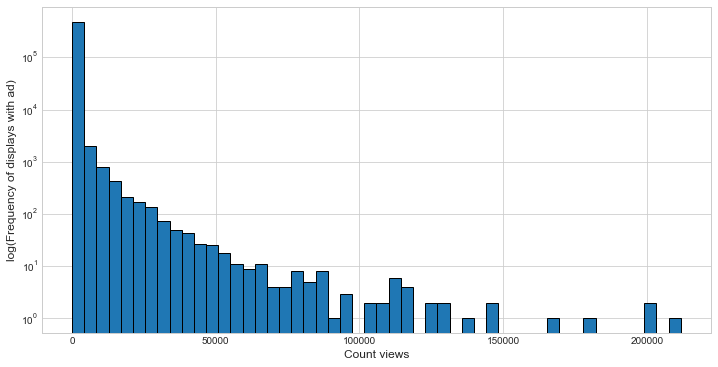

In [7]:
ad_id_train = df_train.groupby('ad_id')['ad_id'].count()
plt.figure(figsize=(12, 6))
plt.hist(ad_id_train.values, bins=50, log=True,edgecolor='black')
plt.xlabel('Count views', fontsize=12)
plt.ylabel('log(Frequency of displays with ad)', fontsize=12)
plt.show()

Ads that were viewed less than 2 times: 22.69%
Ads that were viewed less than 10 times: 61.74%
Ads that were viewed less than 50 times: 86.93%
Ads that were viewed less than 100 times: 91.04%
Ads that were viewed less than 1000 times: 97.45%
Ads that were viewed less than 50000 times: 99.98%
Ads that were viewed less than 200000 times: 100.0%


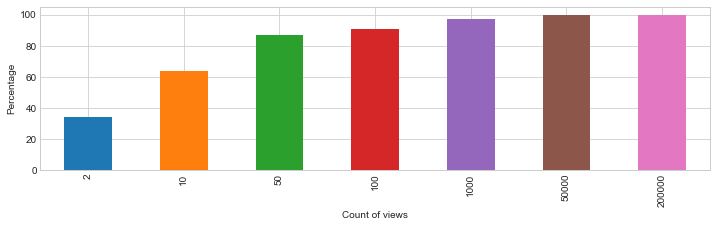

In [8]:
ads_perc1 = Series()
for i in [2, 10, 50, 100, 1000,50000,200000]:
    ads_perc1[str(i)] = round((ad_id_train.values <= i).mean() * 100, 2)
    print('Ads that were viewed less than {} times: {}%'.format(i, round((ad_id_train < i).mean() * 100, 2)))

ax = ads_perc1.plot(kind='bar', figsize=(12,3))
ax = ax.set(ylabel='Percentage', xlabel='Count of views')

In [9]:
ads_freq = df_train['ad_id'].value_counts()
ads_clicked = df_train[df_train['clicked'] == 1]['ad_id'].value_counts()

Text(0,0.5,'log10(Frequency))')

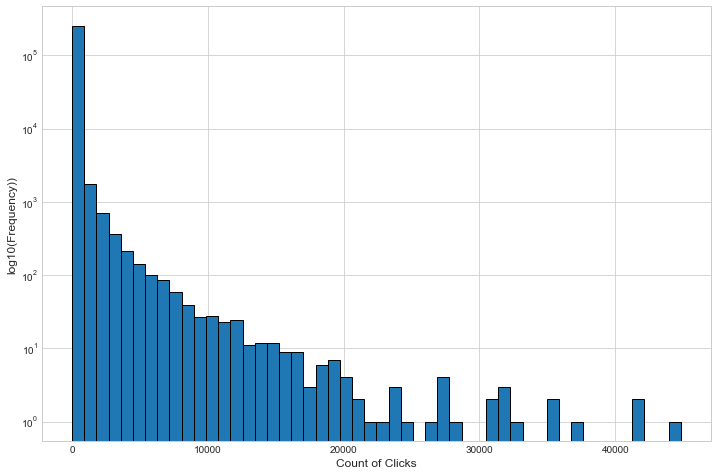

In [10]:
fig= plt.subplots(1,1,figsize=(12,8))
ads_clicked.plot(kind='hist',bins=50,log=True,edgecolor='black')
plt.xlabel('Count of Clicks', fontsize=12)
plt.ylabel('log10(Frequency))', fontsize=12)

In [11]:
#The frequency for count of clicks stops at almost 45000 click, 
ads_clicked.describe()

count    254136.000000
mean         66.399853
std         578.431324
min           1.000000
25%           1.000000
50%           2.000000
75%           7.000000
max       44824.000000
Name: ad_id, dtype: float64

Ads that were clicked less than 2 times: 35.12%
Ads that were clicked less than 10 times: 78.71%
Ads that were clicked less than 50 times: 90.83%
Ads that were clicked less than 100 times: 93.57%
Ads that were clicked less than 1000 times: 98.7%
Ads that were clicked less than 5000 times: 99.79%


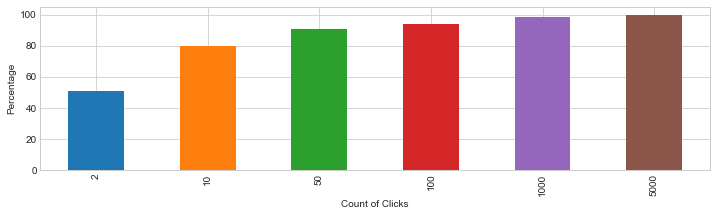

In [12]:
ads_perc = Series()
for i in [2, 10, 50, 100, 1000, 5000]:
    ads_perc[str(i)] = round((ads_clicked.values <= i).mean() * 100, 2)
    print('Ads that were clicked less than {} times: {}%'.format(i, round((ads_clicked < i).mean() * 100, 2)))

ax = ads_perc.plot(kind='bar', figsize=(12,3))
ax = ax.set(ylabel='Percentage', xlabel='Count of Clicks')

[Text(0,0.5,'Log10(Frequency)'), Text(0.5,0,'Count of Clicks')]

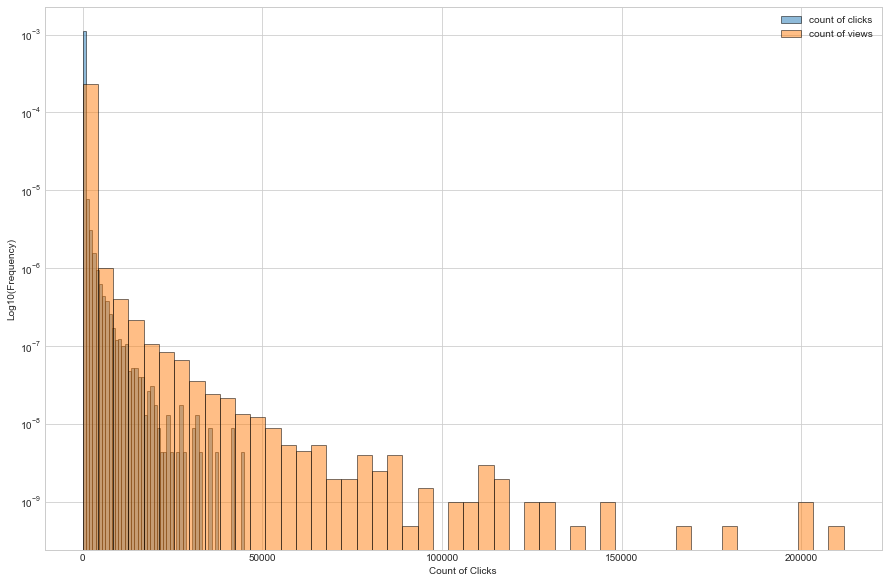

In [13]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,10))

ads_clicked.name ='count of clicks'
ads_freq.name = 'count of views'

ads_clicked.plot(kind='hist',bins=50,normed=True,log=True,alpha=0.5,legend=True,edgecolor='black')
ads_freq.plot(kind='hist',bins=50,normed=True,log=True,alpha=0.5,legend=True,edgecolor='black')
axis1.set(ylabel='Log10(Frequency)', xlabel='Count of Clicks')

In [14]:
#User clicks
df_events = pd.read_csv('all/events.csv')
df_events.head()

/Users/vaishnavisabhahith/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,display_id,uuid,document_id,timestamp,platform,geo_location
0,1,cb8c55702adb93,379743,61,3,US>SC>519
1,2,79a85fa78311b9,1794259,81,2,US>CA>807
2,3,822932ce3d8757,1179111,182,2,US>MI>505
3,4,85281d0a49f7ac,1777797,234,2,US>WV>564
4,5,8d0daef4bf5b56,252458,338,2,SG>00


In [15]:
uuidCounts = df_events.groupby('uuid')['uuid'].count()

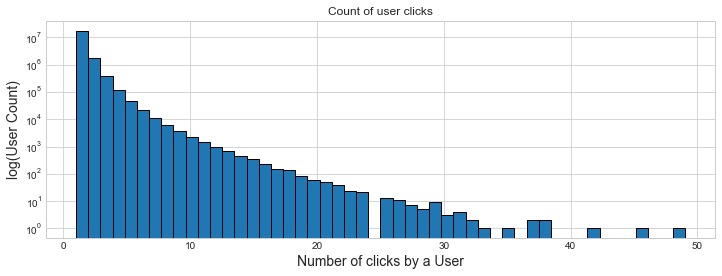

In [16]:
plt.figure(figsize=(12,4))
plt.hist(uuidCounts.values.tolist(), bins=50, log=True,edgecolor='black')
plt.title('Count of user clicks')
plt.xlabel('Number of clicks by a User', fontsize=14)
plt.ylabel('log(User Count)', fontsize=14)
plt.show()

Users that appear less than 1 times: 0.0%
Users that appear less than 2 times: 88.42%
Users that appear less than 5 times: 99.51%


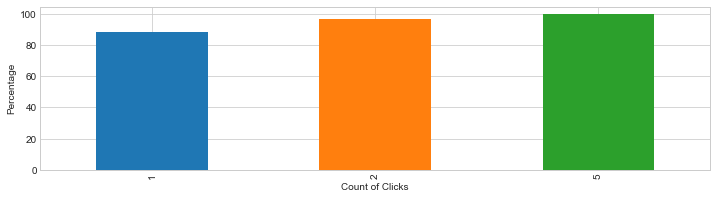

In [17]:
ads_perc2 = Series()
for i in [1,2, 5]:
     ads_perc2[str(i)] = round((uuidCounts.values <= i).mean() * 100, 2)
     print('Users that clicked  less than {} times: {}%'.format(i, round((uuidCounts < i).mean() * 100, 2)))
    
ax1= ads_perc2.plot(kind='bar', figsize=(12,3))
ax1= ax1.set(ylabel='Percentage', xlabel='Count of Clicks')

In [18]:
try:del uuidCounts
except: pass; gc.collect()